In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [2]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [3]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [4]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [5]:
label_map = {0: 0, 2: 1}

In [6]:
class_names = ['airplane', 'bird']


In [7]:
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]

cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

这段代码是从CIFAR-10数据集中筛选出标签为0和2的样本，并将它们的标签映射到新的标签。

以下是详细的步骤：

1. `for img, label in cifar10`：这是一个循环，遍历CIFAR-10数据集中的每个样本。每个样本由一个图像（`img`）和一个标签（`label`）组成。

2. `if label in [0, 2]`：这是一个条件判断，只有当样本的标签是0或2时，才会执行下一步。

3. `(img, label_map[label])`：这是一个元组，包含了图像和新的标签。新的标签是通过`label_map`字典进行映射得到的。

4. `cifar2 = [...]`：这是一个列表推导式，它会生成一个新的列表，列表中的每个元素都是一个元组，包含了一个图像和一个新的标签。

`cifar2_val`的生成过程与`cifar2`类似，只不过它是从验证集`cifar10_val`中筛选样本。

目的是从CIFAR-10数据集中筛选出标签为0和2的样本，并将它们的标签映射到新的标签，以便于进行二分类任务。

In [8]:
print(len(cifar10), len(cifar10_val))
print(len(cifar2), len(cifar2_val))

50000 10000
10000 2000


👆

注意, 这里的`cifar2`和`cifar10`的`len()`, 看起来一样, 但实际上不一样, `cifar10`是`dataset`的`len`, 而`cifar2`是`list`的`len`.

In [9]:
import torch.nn as nn

n_out = 2

In [10]:
cifar2[0][0].shape

torch.Size([3, 32, 32])

```python
 In[12]: cifar2[0]
Out[12]: (tensor([[[ 0.6139, -0.3228,  ..., -0.2752, -0.5451],
                   [ 0.6615, -0.1482,  ..., -0.3228, -0.5768],
                   ...,
                   [ 0.5980,  0.4393,  ..., -0.4340,  0.0265],
                   [ 0.9156,  0.8044,  ..., -0.5451, -0.0529]],
 
                  [[ 1.3369,  0.2740,  ...,  0.3867,  0.0968],
                   [ 1.4497,  0.5961,  ...,  0.3062,  0.0646],
                   ...,
                  [ 0.5478,  0.6605,  ...,  0.4028,  0.8860],
                  [ 0.4834,  0.9504,  ...,  0.1613,  0.7572]],
 
                 [[-0.4487, -0.7935,  ..., -0.6736, -0.8535],
                  [-0.4487, -0.9734,  ..., -0.6286, -0.8535],
                  ...,
                  [-0.4337, -0.4787,  ..., -1.3032, -0.9884],
                  [-0.1789,  0.0310,  ..., -1.3182, -1.0484]]]),
         1)
```

In [11]:
type(cifar2)

list

cifar2 or cifar10: `[(list)[image][label]]`

In [12]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, n_out))

model

Sequential(
  (0): Linear(in_features=3072, out_features=512, bias=True)
  (1): Tanh()
  (2): Linear(in_features=512, out_features=2, bias=True)
)

In [13]:
# 把长度为N的向量转换成概率

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

$$
x _1, x_2, x_3, ..., x_n \Rightarrow \frac{e^{x_1}}{\sum_{i=1}^{n} e^{x_i}}, \frac{e^{x_2}}{\sum_{i=1}^{n} e^{x_i}}, \frac{e^{x_3}}{\sum_{i=1}^{n} e^{x_i}}, ..., \frac{e^{x_n}}{\sum_{i=1}^{n} e^{x_i}}
$$

---

由此, 把二者合起来

👇


In [14]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


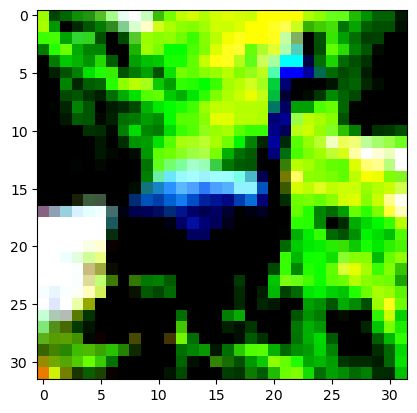

In [15]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [16]:
img_batch = img.view(-1).unsqueeze(0)

In [17]:
img.shape

torch.Size([3, 32, 32])

In [18]:
img.view(-1).shape

torch.Size([3072])

In [19]:
img.view(-1).unsqueeze(0).shape

torch.Size([1, 3072])

```python
 In[21]: img.shape
Out[21]: torch.Size([3, 32, 32])
 In[22]: img.view(-1).shape  # <1>
Out[22]: torch.Size([3072])
 In[23]: img.view(-1).unsqueeze(0).shape
Out[23]: torch.Size([1, 3072])
```

<1>: `view(-1)`相当于全部打平

In [20]:
out = model(img_batch)
out

tensor([[0.4784, 0.5216]], grad_fn=<SoftmaxBackward0>)

In [21]:
_, index = torch.max(out, dim=1)

index

tensor([1])

In [22]:
out = torch.tensor([
    [0.6, 0.4],
    [0.9, 0.1],
    [0.3, 0.7],
    [0.2, 0.8],
])

_, index = torch.max(out, dim=1)
index

tensor([0, 0, 1, 1])

In [23]:
class_index = torch.tensor([0, 0, 1, 1]).unsqueeze(1)
class_index

tensor([[0],
        [0],
        [1],
        [1]])

`unsqueeze()`是PyTorch中的一个函数，用于在张量的指定位置添加一个维度。

在这个例子中，`unsqueeze(1)`是在张量的第二个维度（索引从0开始）添加一个维度。原始的张量`torch.tensor([0, 0, 1, 1])`是一个一维张量，形状为`(4,)`。调用`unsqueeze(1)`后，它变成了一个二维张量，形状为`(4, 1)`。

In [24]:
class_index = torch.tensor([0, 0, 1, 1]).unsqueeze(1)
truth = torch.zeros((4,2))
truth.scatter_(dim=1, index=class_index, value=1.0)
truth

tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.]])

即转成一个看起来像是one-hot的的形式, 虽然这里和one-hot八竿子打不着.

$$
\begin{bmatrix}
0 \\ 0 \\ 1 \\ 1
\end{bmatrix}
\Rightarrow
\begin{bmatrix}
1 & 0 \\ 1 & 0 \\ 0 & 1 \\ 0 & 1
\end{bmatrix}
$$

In [25]:
def mse(out):
    return ((out - truth) ** 2).sum(dim=1).mean()
mse(out)

tensor(0.1500)

In [26]:
out.gather(dim=1, index=class_index)

tensor([[0.6000],
        [0.9000],
        [0.7000],
        [0.8000]])

In [27]:
out

tensor([[0.6000, 0.4000],
        [0.9000, 0.1000],
        [0.3000, 0.7000],
        [0.2000, 0.8000]])

In [28]:
def likelihood(out):
    prod = 1.0
    for x in out.gather(dim=1, index=class_index):
        prod *= x
    return prod

likelihood(out)

tensor([0.3024])

即:

$$
prod = out \_ 1 \times out \_ 2 \times \cdots \times out \_ n
$$

In [29]:
def neg_log_likelihood(out):
    return -likelihood(out).log()

neg_log_likelihood(out)

tensor([1.1960])

In [30]:
def neg_log_likelihood(out):
    prod = 1.0
    for x in out.gather(dim=1, index=class_index):
        prod *= x
    return -prod.log()

neg_log_likelihood(out)

tensor([1.1960])

> 以下为试着用`nn.NLLLose()`来实现和上面一样的效果, 但是不会 😭

In [31]:
loss = nn.NLLLoss()
out_log_softmax = torch.log_softmax(out, dim=1)
loss(out_log_softmax, class_index.view(-1))

tensor(0.4799)

In [32]:
loss = nn.NLLLoss()
# loss(out.view(-1).unsqueeze(0), torch.tensor([0]))

In [33]:
loss(out
     .gather(dim=1, index=class_index)
     .view(-1)
     .unsqueeze(0),
     torch.tensor([0])
)

tensor(-0.6000)

$$
NLL = - \log(prod) = - \sum_{i=1}^{n} \log(out \_ i)
$$

---

In [34]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 104.0]])
softmax(x)

tensor([[0., 1.]])

In [35]:
torch.log(softmax(x))

tensor([[-inf, 0.]])

In [36]:
log_softmax(x)

tensor([[-104.,    0.]])

```python
 In[29]: x = torch.tensor([[0.0, 104.0]])
 In[30]: tensor.log(softmax(x))
Out[30]: tensor([[-inf, 0.]])
 In[31]: nn.LogSoftmax(dim=1)(x)
Out[31]: tensor([[-104., 0.]])
```

由于`softmax`函数的输出值在0到1之间, 因此它们的对数的输入值在趋向于0的时候会趋向于`-inf`, 这会导致数值计算错误. 为了解决这个问题, PyTorch提供了一个`nn.LogSoftmax`类, 它可以确保输入值始终在可计算的范围内.

In [37]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

In [38]:
loss = nn.NLLLoss()

负对数似然（Negative Log Likelihood，NLL）的计算过程。在这个公式中，`prod`表示的是所有输出概率的乘积，`out_i`表示的是第`i`个输出的概率。

具体来说，这个公式首先计算了所有输出概率的乘积`prod`，然后取对数，最后取负数。这个过程可以用以下的数学公式表示：

$$
NLL = - \log(prod) = - \log(\prod_{i=1}^{n} out_i) = - \sum_{i=1}^{n} \log(out_i)
$$

这里，$\prod_{i=1}^{n} out_i$表示的是所有输出概率的乘积，$\sum_{i=1}^{n} \log(out_i)$表示的是所有输出概率对数的和。这个公式说明，负对数似然等于所有输出概率对数的和的负数。

In [39]:
img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(0.5077, grad_fn=<NllLossBackward0>)

In [40]:
out, torch.tensor([label])

(tensor([[-0.9211, -0.5077]], grad_fn=<LogSoftmaxBackward0>), tensor([1]))

👆

不用one-hot

In [332]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 8.307038
Epoch: 1, Loss: 5.457431
Epoch: 2, Loss: 3.882373
Epoch: 3, Loss: 3.154704
Epoch: 4, Loss: 11.443868
Epoch: 5, Loss: 7.831904
Epoch: 6, Loss: 0.055682
Epoch: 7, Loss: 7.118860
Epoch: 8, Loss: 6.412682
Epoch: 9, Loss: 5.462630
Epoch: 10, Loss: 6.324239
Epoch: 11, Loss: 8.132204
Epoch: 12, Loss: 4.478361
Epoch: 13, Loss: 0.397974
Epoch: 14, Loss: 3.924431
Epoch: 15, Loss: 6.191980
Epoch: 16, Loss: 4.834426
Epoch: 17, Loss: 6.948432
Epoch: 18, Loss: 0.884499
Epoch: 19, Loss: 10.726386
Epoch: 20, Loss: 8.787334
Epoch: 21, Loss: 5.266410
Epoch: 22, Loss: 7.096104
Epoch: 23, Loss: 4.407344
Epoch: 24, Loss: 6.470562
Epoch: 25, Loss: 10.756291
Epoch: 26, Loss: 16.045588
Epoch: 27, Loss: 13.241747
Epoch: 28, Loss: 8.135650
Epoch: 29, Loss: 9.221145
Epoch: 30, Loss: 11.256797
Epoch: 31, Loss: 13.286485
Epoch: 32, Loss: 14.590942
Epoch: 33, Loss: 19.243477
Epoch: 34, Loss: 7.613646
Epoch: 35, Loss: 8.939101
Epoch: 36, Loss: 5.921707
Epoch: 37, Loss: 7.737715
Epoch: 38, Lo

👆

其`CUDA`改版在 [bird_airplane_cuda.ipynb🔗](./2_birds_airplanes_cuda.ipynb) 中.

---

但是, 这些都是错误做法, 下面为正确做法

👇

In [41]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

这段代码创建了一个数据加载器（DataLoader），它可以用于在训练模型时加载数据。

`torch.utils.data.DataLoader`是PyTorch中的一个类，它可以用于创建一个可迭代的数据加载器，这个数据加载器可以在训练模型时按批次加载数据。

在这段代码中，`cifar2`是一个数据集，`batch_size=64`表示每个批次包含64个样本，`shuffle=True`表示在每个训练周期开始时，数据加载器会随机打乱数据集。

这样，当你在训练模型时遍历这个数据加载器，你会得到一系列包含64个样本的批次，这些批次是从打乱后的数据集中取出的。这可以帮助提高模型的泛化能力，因为模型不会在每个训练周期看到相同的数据顺序。

In [42]:
model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 3.020157
Epoch: 1, Loss: 1.885714
Epoch: 2, Loss: 2.744082
Epoch: 3, Loss: 1.742298
Epoch: 4, Loss: 2.140091
Epoch: 5, Loss: 3.345408
Epoch: 6, Loss: 4.386397


KeyboardInterrupt: 

In [79]:
# 在 CUDA 上运行

device = (torch.device('cuda') if torch.cuda.is_available()
            else torch.device('cpu'))

cifar2 = [(img.to(device), torch.tensor(label).to(device)) for img, label in cifar2]

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

/tmp/ipykernel_2975/3483380273.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cifar2 = [(img.to(device), torch.tensor(label).to(device)) for img, label in cifar2]


In [80]:
for imgs, labels in train_loader:
    imgs = imgs.to(device)
    # print(imgs.device)
    labels = labels.to(device)
    # 然后你可以在GPU上使用imgs和labels进行计算

In [77]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1)).to(device)

In [81]:
imgs.device

device(type='cuda', index=0)

In [82]:
learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

print(imgs.device)

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

cuda:0
Epoch: 0, Loss: 0.401982
Epoch: 1, Loss: 0.381849
Epoch: 2, Loss: 0.450954
Epoch: 3, Loss: 0.415909
Epoch: 4, Loss: 0.411755
Epoch: 5, Loss: 0.431124
Epoch: 6, Loss: 0.348293
Epoch: 7, Loss: 0.386919
Epoch: 8, Loss: 0.498217
Epoch: 9, Loss: 0.220726
Epoch: 10, Loss: 0.228338
Epoch: 11, Loss: 0.215935
Epoch: 12, Loss: 0.213874
Epoch: 13, Loss: 0.583013
Epoch: 14, Loss: 0.152084
Epoch: 15, Loss: 0.344742
Epoch: 16, Loss: 0.240151
Epoch: 17, Loss: 0.656426
Epoch: 18, Loss: 0.272190
Epoch: 19, Loss: 0.225819
Epoch: 20, Loss: 0.138272
Epoch: 21, Loss: 0.208415
Epoch: 22, Loss: 0.087229
Epoch: 23, Loss: 0.214843
Epoch: 24, Loss: 0.119950
Epoch: 25, Loss: 0.315016
Epoch: 26, Loss: 0.390686
Epoch: 27, Loss: 0.373909
Epoch: 28, Loss: 0.130507
Epoch: 29, Loss: 0.487183
Epoch: 30, Loss: 0.211321
Epoch: 31, Loss: 0.181469
Epoch: 32, Loss: 0.358832
Epoch: 33, Loss: 0.359586
Epoch: 34, Loss: 0.035283
Epoch: 35, Loss: 0.146537
Epoch: 36, Loss: 0.081952
Epoch: 37, Loss: 0.254822
Epoch: 38, Loss

值得注意的是上面的情况中, 先将cifar2转入CUDA, 之后再调用Dataloader, 之后再将imgs和labels转入CUDA. 虽然我感觉这个将imgs和labels转入CUDA的步骤应当是多余的, 但是这里需要它的存在就理解为需要吧.

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

这段代码是用来计算模型在`cifar2`数据集上的准确率的。

1. 首先，它创建了一个`DataLoader`实例`train_loader`，用于从`cifar2`数据集中批量地、顺序地获取数据。每个批次包含64个样本。

2. 然后，它初始化了两个变量`correct`和`total`，用于记录模型预测正确的样本数和总样本数。

3. 在`torch.no_grad()`上下文中，它遍历了`train_loader`中的每个批次。这个上下文表示在进行以下计算时，不会计算梯度，这可以节省内存，因为在评估模型时，我们通常不需要计算梯度。

4. 对于每个批次，它首先使用`model`计算了输出`outputs`。`imgs.view(imgs.shape[0], -1)`是将每个图像张量展平为一维张量，因为这个模型期望的输入是一维张量。

5. 然后，它使用`torch.max(outputs, dim=1)`获取了每个样本的预测类别`predicted`。`torch.max`返回每行的最大值和对应的索引，由于我们关心的是索引（即预测的类别），所以我们只取了第二个返回值。

6. 接着，它更新了`total`和`correct`。`total`是通过加上当前批次的样本数来更新的，`correct`是通过加上当前批次预测正确的样本数来更新的。`predicted == labels`返回一个布尔张量，表示预测是否正确，然后使用`.sum()`计算了预测正确的样本数，最后使用`int()`将其转换为Python的整数。

7. 最后，它计算了准确率，即预测正确的样本数除以总样本数，然后打印了这个准确率。

> 创建DataLoader 👉 初始化计数器 👉 禁用梯度计算 👉 遍历每个批次 👉 计算模型输出 👉 获取预测类别 👉 更新总样本数和正确样本数 👉 计算并打印准确率

In [84]:
cifar2_val = [(img.to(device), torch.tensor(label).to(device)) for img, label in cifar2_val]

val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.820000


In [ ]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

In [ ]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

loss_fn = nn.CrossEntropyLoss()

In [88]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2)).to(device)

learning_rate = 1e-1

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.643245
Epoch: 1, Loss: 0.365323
Epoch: 2, Loss: 0.393448
Epoch: 3, Loss: 0.858701
Epoch: 4, Loss: 0.422100
Epoch: 5, Loss: 0.655607
Epoch: 6, Loss: 0.092933
Epoch: 7, Loss: 0.373354
Epoch: 8, Loss: 0.185177
Epoch: 9, Loss: 0.460527
Epoch: 10, Loss: 0.233466
Epoch: 11, Loss: 0.312932
Epoch: 12, Loss: 0.326700
Epoch: 13, Loss: 0.185652
Epoch: 14, Loss: 0.030974
Epoch: 15, Loss: 0.250340
Epoch: 16, Loss: 0.062179
Epoch: 17, Loss: 0.069178
Epoch: 18, Loss: 0.084300
Epoch: 19, Loss: 0.250483
Epoch: 20, Loss: 0.014147
Epoch: 21, Loss: 0.165017
Epoch: 22, Loss: 0.212048
Epoch: 23, Loss: 0.046711
Epoch: 24, Loss: 0.051985
Epoch: 25, Loss: 0.026623
Epoch: 26, Loss: 0.028496
Epoch: 27, Loss: 0.020303
Epoch: 28, Loss: 0.126234
Epoch: 29, Loss: 0.038119
Epoch: 30, Loss: 0.441577
Epoch: 31, Loss: 0.015802
Epoch: 32, Loss: 0.019013
Epoch: 33, Loss: 0.054425
Epoch: 34, Loss: 0.011222
Epoch: 35, Loss: 0.004084
Epoch: 36, Loss: 0.039883
Epoch: 37, Loss: 0.004341
Epoch: 38, Loss: 0.000

In [89]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


In [90]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.822500
